In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(1)
np.random.seed(1)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV , StratifiedKFold,learning_curve
from sklearn.metrics import f1_score , confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from keras.regularizers import l2

# Preprocessing

In [3]:
dataset = pd.read_csv('main_data.csv',index_col=0)
features = dataset.columns.tolist()
features.remove('target')
home_features = features[:19]
away_features = features[19:]

In [4]:
features_19 = [feature[:-4]+'diff' for feature in home_features]
def dataset19(df):
    dataset_19 = pd.DataFrame(df[home_features].values - df[away_features].values,columns=features_19)
    dataset_19['target'] = df['target']
    return dataset_19

In [5]:
data_19_feature = dataset19(dataset)

In [6]:
random_state = 1

In [7]:
def split_data(df):
    X = df.drop('target',axis=1)
    y = df['target']
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=random_state,stratify=y.values)
    return X_train , X_test , y_train , y_test

In [8]:
def under_sampling(df):
    win_count , loss_count , draw_count = df['target'].value_counts()
    win_sample = df[df['target'] == 1].sample(draw_count,random_state=random_state)
    loss_sample = df[df['target'] == 0].sample(draw_count,random_state=random_state)
    draw_sample = df[df['target'] == 2].sample(draw_count,random_state=random_state)
    return pd.concat([win_sample, loss_sample , draw_sample], axis=0).sample(frac=1,random_state=random_state).reset_index(drop=True)

In [9]:
X_train_38 , X_test_38 , y_train_38 , y_test_38 = (dataset)
X_train_19 , X_test_19 , y_train_19 , y_test_19 = split_data(data_19_feature)
print("X_train_38 shape is:" , X_train_38.shape)
print("y_train_38 shape is:" , y_train_38.shape)
print("X_test_38 shape is:" , X_test_38.shape)
print("y_test_38 shape is:" , y_test_38.shape)
print("X_train_19 shape is:" , X_train_19.shape)
print("y_train_19 shape is:" , y_train_19.shape)
print("X_test_19 shape is:" , X_test_19.shape)
print("y_test_19 shape is:" , y_test_19.shape)

X_train_38 shape is: (6968, 38)
y_train_38 shape is: (6968,)
X_test_38 shape is: (1743, 38)
y_test_38 shape is: (1743,)
X_train_19 shape is: (6968, 19)
y_train_19 shape is: (6968,)
X_test_19 shape is: (1743, 19)
y_test_19 shape is: (1743,)


In [10]:
def preprocessing(train,test):
    scaler = StandardScaler()
    X_preprocessed = pd.DataFrame(scaler.fit_transform(train),columns=train.columns)
    test_preprocessed = pd.DataFrame(scaler.transform(test),columns=test.columns)
    return X_preprocessed,test_preprocessed

In [11]:
X_train_38_preprocessed , X_test_38_preprocessed = preprocessing(X_train_38,X_test_38)
X_train_19_preprocessed , X_test_19_preprocessed = preprocessing(X_train_19,X_test_19)

# Modeling

In [152]:
logistic_regression = LogisticRegression(random_state=random_state)
XGC = XGBClassifier(random_state=random_state)
RandomForest = RandomForestClassifier(random_state=random_state)
KNN = KNeighborsClassifier(n_neighbors=4)
models = {
    'logistic_regression': logistic_regression,
    'KNN': KNN,
    'RandomForest':RandomForest,
    'XGC': XGC,
}

In [13]:
def evaluation(model,x_train,y_train,x_test,y_test):
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    f1 = f1_score(y_test, y_predicted, average='weighted')
    print('The f1 score is ',f1)
    print(confusion_matrix(y_true=y_test, y_pred=y_predicted), classification_report(y_true=y_test, y_pred=y_predicted))
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    N , train_score , val_score = learning_curve(model,x_train,y_train,cv=cv,scoring='f1_weighted',random_state=random_state,train_sizes=np.linspace(0.1,1,10))
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),label="Train Score")
    plt.plot(N,val_score.mean(axis=1),label="Validation Score")
    plt.legend()
    plt.show()

logistic_regression
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Using 38 features -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The f1 score is  0.4296153434231748
[[282 250   8]
 [149 588  13]
 [153 295   5]]               precision    recall  f1-score   support

         0.0       0.48      0.52      0.50       540
         1.0       0.52      0.78      0.62       750
         2.0       0.19      0.01      0.02       453

    accuracy                           0.50      1743
   macro avg       0.40      0.44      0.38      1743
weighted avg       0.42      0.50      0.43      1743



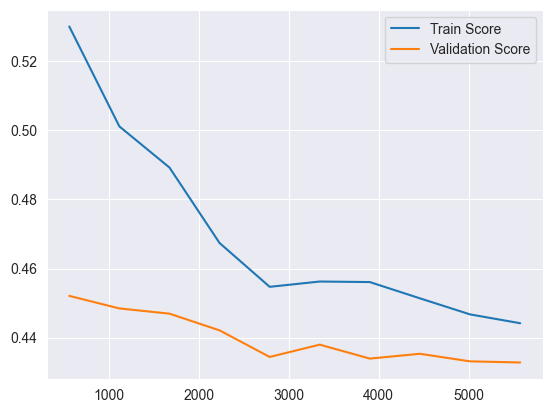

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Using 19 features -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The f1 score is  0.4288095786217167
[[291 249   0]
 [154 595   1]
 [156 297   0]]               precision    recall  f1-score   support

         0.0       0.48      0.54      0.51       540
         1.0       0.52      0.79      0.63       750
         2.0       0.00      0.00      0.00       453

    accuracy                           0.51      1743
   macro avg       0.34      0.44      0.38      1743
weighted avg       0.37      0.51      0.43      1743



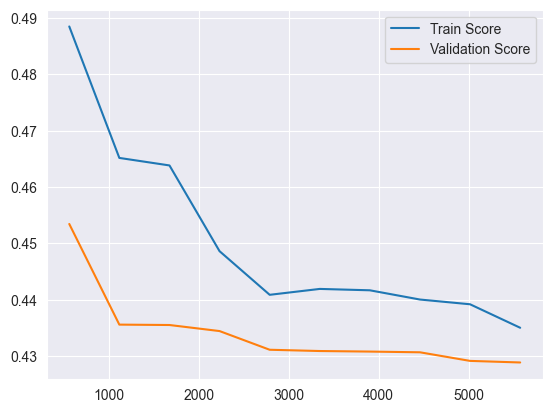

SVC
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Using 38 features -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The f1 score is  0.4380800430955104
[[267 267   6]
 [134 609   7]
 [133 308  12]]               precision    recall  f1-score   support

         0.0       0.50      0.49      0.50       540
         1.0       0.51      0.81      0.63       750
         2.0       0.48      0.03      0.05       453

    accuracy                           0.51      1743
   macro avg       0.50      0.44      0.39      1743
weighted avg       0.50      0.51      0.44      1743



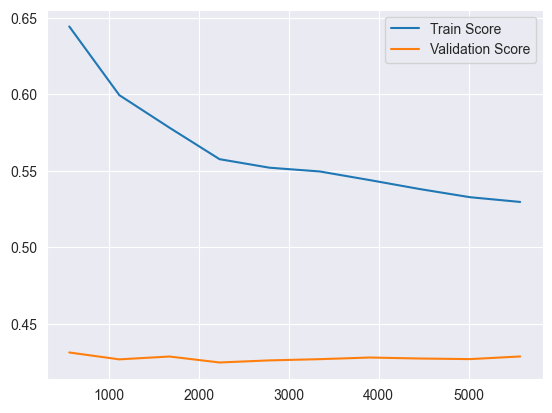

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Using 19 features -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The f1 score is  0.4314773081420407
[[262 275   3]
 [126 622   2]
 [128 320   5]]               precision    recall  f1-score   support

         0.0       0.51      0.49      0.50       540
         1.0       0.51      0.83      0.63       750
         2.0       0.50      0.01      0.02       453

    accuracy                           0.51      1743
   macro avg       0.51      0.44      0.38      1743
weighted avg       0.51      0.51      0.43      1743



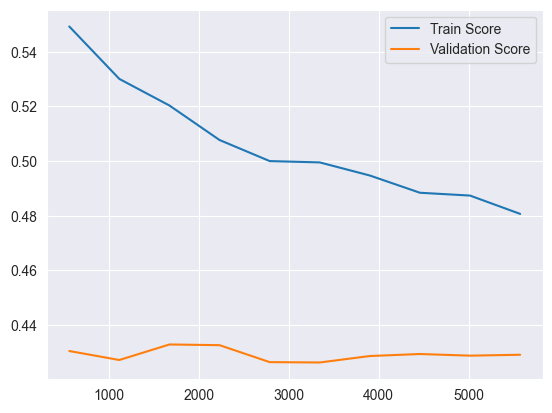

XGC
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Using 38 features -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The f1 score is  0.44635930429369236
[[248 208  84]
 [168 491  91]
 [150 228  75]]               precision    recall  f1-score   support

         0.0       0.44      0.46      0.45       540
         1.0       0.53      0.65      0.59       750
         2.0       0.30      0.17      0.21       453

    accuracy                           0.47      1743
   macro avg       0.42      0.43      0.42      1743
weighted avg       0.44      0.47      0.45      1743



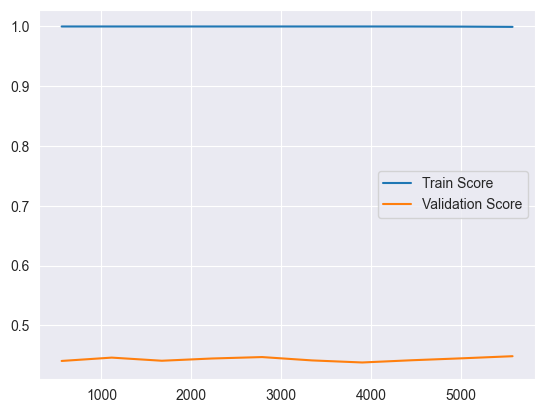

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Using 19 features -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
The f1 score is  0.439351066702302
[[247 213  80]
 [165 484 101]
 [152 230  71]]               precision    recall  f1-score   support

         0.0       0.44      0.46      0.45       540
         1.0       0.52      0.65      0.58       750
         2.0       0.28      0.16      0.20       453

    accuracy                           0.46      1743
   macro avg       0.41      0.42      0.41      1743
weighted avg       0.43      0.46      0.44      1743



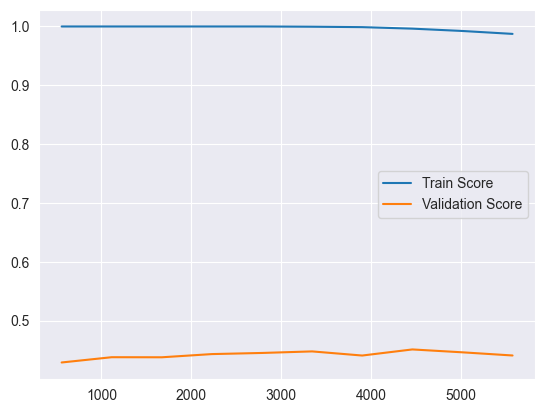

In [14]:
for name,model in models.items():
    print(name)
    print('-*' * 20 + ' Using 38 features ' + '-*' * 20)
    evaluation(model,X_train_38_preprocessed,y_train_38,X_test_38_preprocessed,y_test_38)
    print('-*' * 20 + ' Using 19 features ' + '-*' * 20)
    evaluation(model,X_train_19_preprocessed,y_train_19,X_test_19_preprocessed,y_test_19)

In [47]:
data_under = under_sampling(dataset)
X_train_under , X_test_under , y_train_under , y_test_under = split_data(data_under)
print('y_train value_counts\n',y_train_under.value_counts())
print('y_test value_counts\n',y_test_under.value_counts())
X_train_under_preprocessed , X_test_under_preprocessed = preprocessing(X_train_under,X_test_under)

y_train value_counts
 0.0    1811
1.0    1810
2.0    1810
Name: target, dtype: int64
y_test value_counts
 1.0    453
2.0    453
0.0    452
Name: target, dtype: int64


logistic_regression
The f1 score is  0.460200520980149
[[229 113 110]
 [ 89 268  96]
 [156 159 138]]               precision    recall  f1-score   support

         0.0       0.48      0.51      0.49       452
         1.0       0.50      0.59      0.54       453
         2.0       0.40      0.30      0.35       453

    accuracy                           0.47      1358
   macro avg       0.46      0.47      0.46      1358
weighted avg       0.46      0.47      0.46      1358



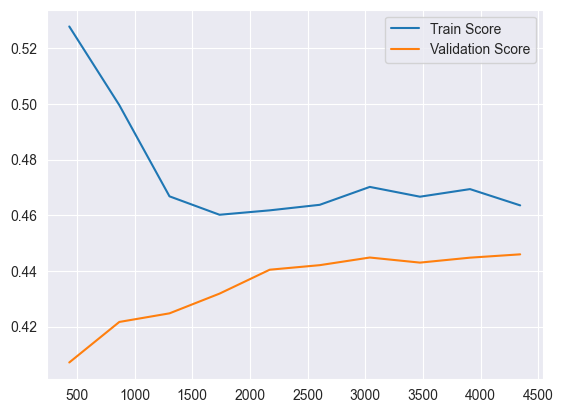

KNN
The f1 score is  0.4191179222024918
[[253 113  86]
 [135 207 111]
 [181 151 121]]               precision    recall  f1-score   support

         0.0       0.44      0.56      0.50       452
         1.0       0.44      0.46      0.45       453
         2.0       0.38      0.27      0.31       453

    accuracy                           0.43      1358
   macro avg       0.42      0.43      0.42      1358
weighted avg       0.42      0.43      0.42      1358



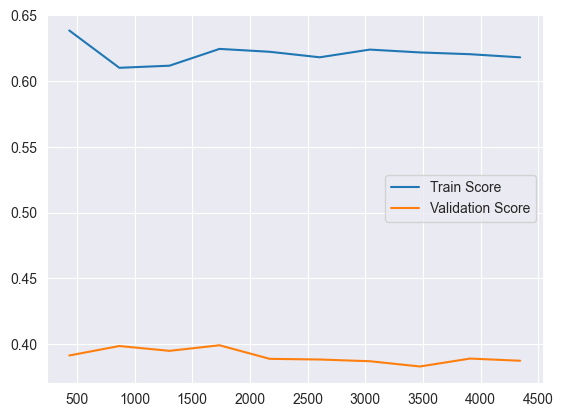

RandomForest
The f1 score is  0.4587473583015357
[[225 104 123]
 [ 80 248 125]
 [145 154 154]]               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50       452
         1.0       0.49      0.55      0.52       453
         2.0       0.38      0.34      0.36       453

    accuracy                           0.46      1358
   macro avg       0.46      0.46      0.46      1358
weighted avg       0.46      0.46      0.46      1358



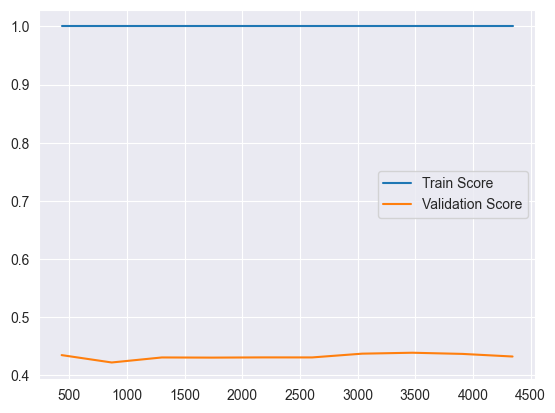

XGC
The f1 score is  0.4391175884525951
[[237 107 108]
 [ 89 228 136]
 [146 170 137]]               precision    recall  f1-score   support

         0.0       0.50      0.52      0.51       452
         1.0       0.45      0.50      0.48       453
         2.0       0.36      0.30      0.33       453

    accuracy                           0.44      1358
   macro avg       0.44      0.44      0.44      1358
weighted avg       0.44      0.44      0.44      1358



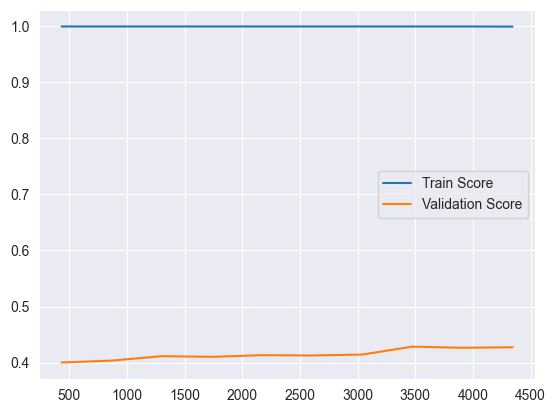

In [51]:
for name,model in models.items():
    print(name)
    evaluation(model,X_train_under_preprocessed,y_train_under,X_test_under_preprocessed,y_test_under)

In [73]:
models['XGC'].fit(X_train_38,y_train_38)
y_pred = models['XGC'].predict(X_test_38)
f1 = f1_score(y_test_38, y_pred, average='weighted')
acc = accuracy_score(y_test_38, y_pred)
print('f1 = ',f1)
print('acc = ',acc)

f1 =  0.4495307627282547
acc =  0.47332185886402756


In [72]:
models['XGC'].get_params()['reg_lambda']

10

In [70]:
models['XGC'].set_params(
    reg_lambda = 10,
)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

In [18]:
models['RandomForest'].fit(X_train_38_preprocessed,y_train_38)
y_pred = models['RandomForest'].predict(X_test_38_preprocessed)
f1 = f1_score(y_test_38, y_pred, average='weighted')
acc = accuracy_score(y_test_38, y_pred)
print('f1 = ',f1)
print('acc = ',acc)

f1 =  0.4509750705440998
acc =  0.4968445209409065


In [25]:
feature_importance = pd.DataFrame(models['RandomForest'].feature_importances_, index= X_train_38_preprocessed.columns)

<AxesSubplot:>

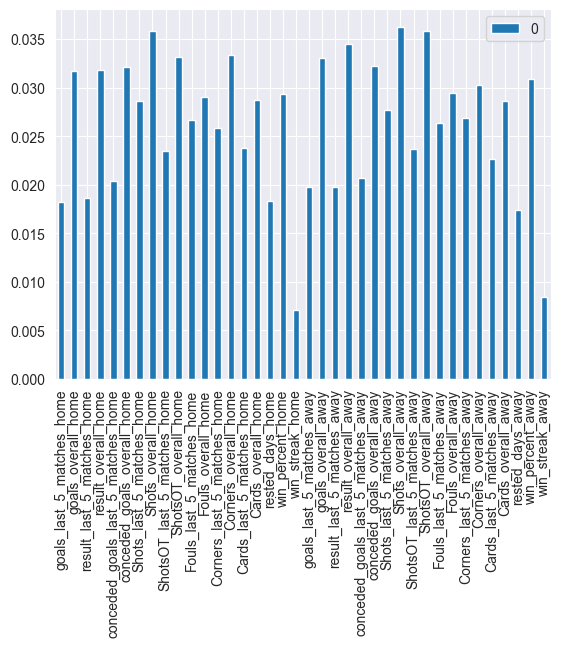

In [44]:
feature_importance.plot.bar()

<AxesSubplot:>

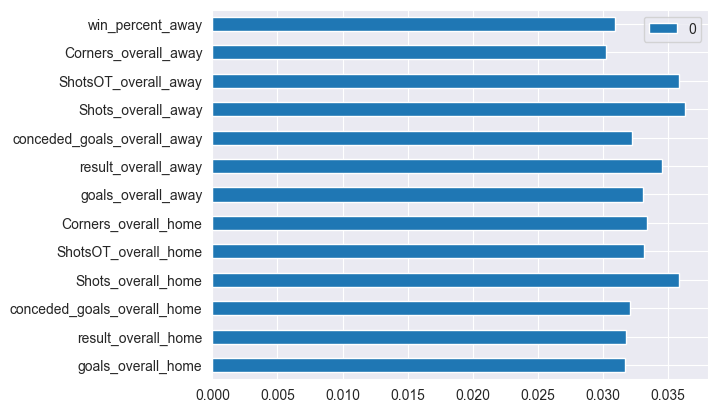

In [42]:
feature_importance[feature_importance[0]>0.03].plot.barh()

In [130]:
selector = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=50))
X_train_selected = selector.fit_transform(X_train_38_preprocessed,y_train_38)
X_test_selected = selector.transform(X_test_38_preprocessed)

In [131]:
models['XGC'].fit(X_train_selected,y_train_38)
y_pred = models['XGC'].predict(X_test_selected)
f1 = f1_score(y_test_38, y_pred, average='weighted')
acc = accuracy_score(y_test_38, y_pred)
print('f1 = ',f1)
print('acc = ',acc)

f1 =  0.4449867630860166
acc =  0.46815834767641995


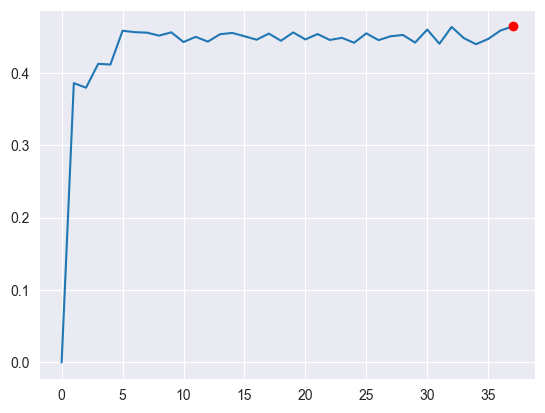

In [55]:


f1_scores = [0]
best_k = 0
for i in range(1,38):
    iterating_model = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=i),models['RandomForest'])
    iterating_model.fit(X_train_38_preprocessed,y_train_38)
    scored = f1_score(y_true=y_test_38,y_pred=iterating_model.predict(X_test_38_preprocessed), average='weighted')
    f1_scores.append(scored)
    if scored > f1_scores[best_k]:
        best_k = i
plt.figure()
plt.plot(f1_scores)
plt.plot(best_k,f1_scores[best_k],'ro')

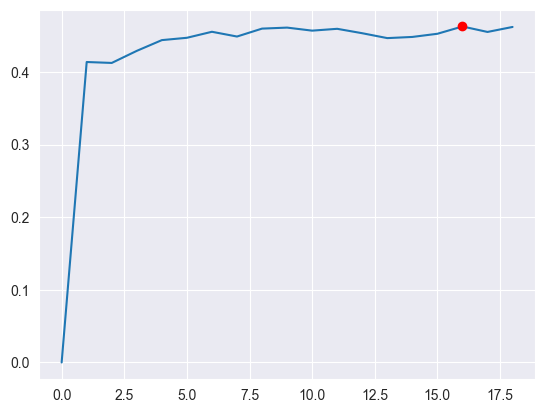

In [57]:
f1_scores = [0]
best_k = 0
for i in range(1,19):
    iterating_model = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=i),models['RandomForest'])
    iterating_model.fit(X_train_19_preprocessed,y_train_19)
    scored = f1_score(y_true=y_test_19,y_pred=iterating_model.predict(X_test_19_preprocessed), average='weighted')
    f1_scores.append(scored)
    if scored > f1_scores[best_k]:
        best_k = i
plt.figure()
plt.plot(f1_scores)
plt.plot(best_k,f1_scores[best_k],'ro')

#### DNN


In [58]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.utils import compute_class_weight

def dnn(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        BatchNormalization(),
        Dense(3, activation='softmax')
    ])
    return model

In [59]:
first_model = dnn(38)

In [97]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_38), y= y_train_38)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [103]:
first_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [73]:
def convert_target(target):
    target_int = target.astype(int)
    return np.eye(3)[target_int]

In [77]:
y_train_38_dnn = convert_target(y_train_38.values)
y_test_38_dnn = convert_target(y_test_38.values)

In [109]:
history = first_model.fit(X_train_38_preprocessed, y_train_38_dnn, epochs=100, batch_size=32, validation_data=(X_test_38_preprocessed, y_test_38_dnn),class_weight = class_weights_dict)

test_loss, test_accuracy = first_model.evaluate(X_test_38_preprocessed, y_test_38_dnn)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
218/218 [==============================] - 1s 3ms/step - loss: 0.7686 - accuracy: 0.6523 - val_loss: 1.1953 - val_accuracy: 0.4446
Epoch 2/100
218/218 [==============================] - 1s 3ms/step - loss: 0.7806 - accuracy: 0.6395 - val_loss: 1.1881 - val_accuracy: 0.4412
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 0.7820 - accuracy: 0.6518 - val_loss: 1.1886 - val_accuracy: 0.4349
Epoch 4/100
218/218 [==============================] - 1s 3ms/step - loss: 0.7679 - accuracy: 0.6574 - val_loss: 1.1875 - val_accuracy: 0.4291
Epoch 5/100
218/218 [==============================] - 1s 3ms/step - loss: 0.7709 - accuracy: 0.6550 - val_loss: 1.1926 - val_accuracy: 0.4251
Epoch 6/100
218/218 [==============================] - 1s 3ms/step - loss: 0.7828 - accuracy: 0.6467 - val_loss: 1.1915 - val_accuracy: 0.4400
Epoch 7/100
218/218 [==============================] - 1s 3ms/step - loss: 0.7568 - accuracy: 0.6625 - val_loss: 1.2162 - val_accuracy: 0.4205

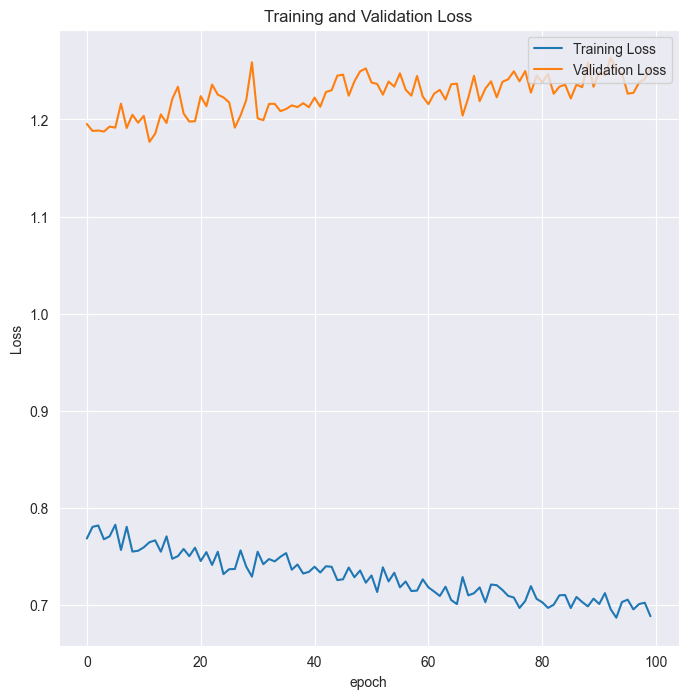

In [110]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

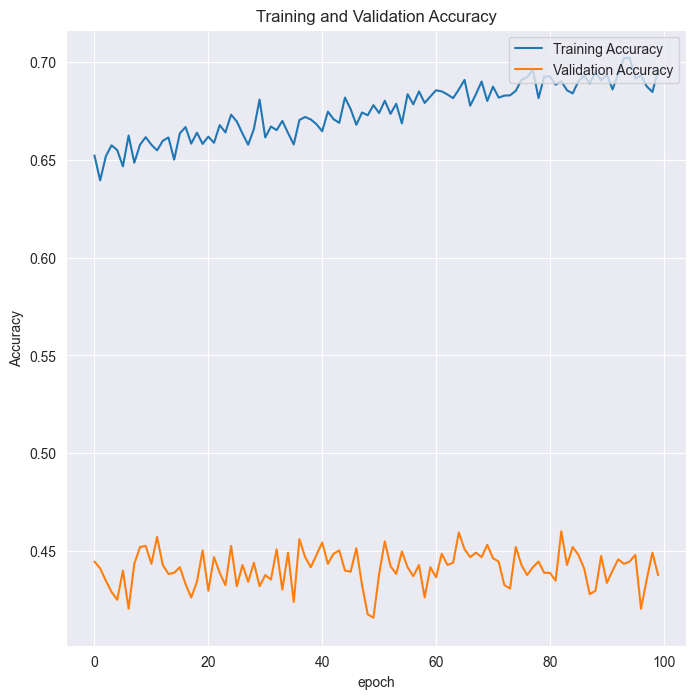

In [112]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Accuracy')
plt.plot(val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

### Predicting only Win / Loss (No Draw)

In [140]:
no_draws = dataset[dataset['target']!=2]
X_train_nodraws , X_test_nodraws , y_train_nodraws , y_test_nodraws = split_data(no_draws)
X_train_nodraws_preprocessed , X_test_nodraws_preprocessed = preprocessing(X_train_nodraws,X_test_nodraws)

In [153]:
models['XGC'].fit(X_train_nodraws_preprocessed,y_train_nodraws)
y_pred = models['XGC'].predict(X_test_nodraws_preprocessed)
f1 = f1_score(y_test_nodraws, y_pred, average='weighted')
acc = accuracy_score(y_test_nodraws, y_pred)
print('f1 = ',f1)
print('acc = ',acc)

f1 =  0.6440247301390969
acc =  0.648062015503876


In [155]:
models['RandomForest'].fit(X_train_nodraws_preprocessed,y_train_nodraws)
y_pred = models['RandomForest'].predict(X_test_nodraws_preprocessed)
f1 = f1_score(y_test_nodraws, y_pred, average='weighted')
acc = accuracy_score(y_test_nodraws, y_pred)
print('f1 = ',f1)
print('acc = ',acc)

f1 =  0.6782420206174077
acc =  0.6821705426356589


In [156]:
feature_importance_no_draw = pd.DataFrame(models['RandomForest'].feature_importances_, index=X_train_nodraws_preprocessed.columns)

<AxesSubplot:>

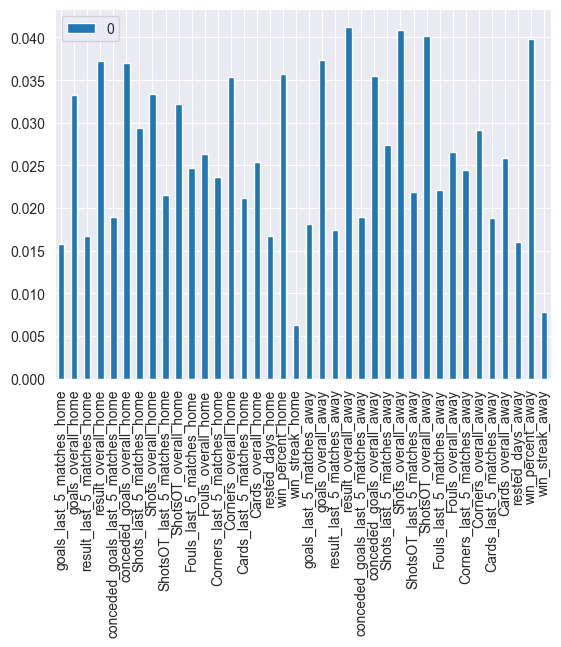

In [157]:
feature_importance_no_draw.plot.bar()

<AxesSubplot:>

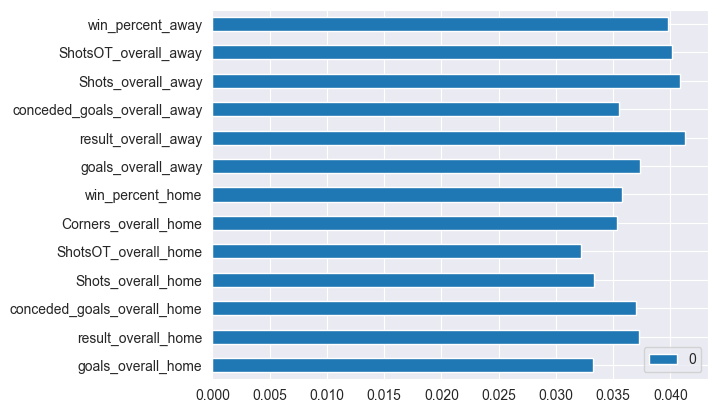

In [158]:
feature_importance_no_draw[feature_importance_no_draw[0]>=0.03].plot.barh()

In [203]:
def dnn_nodraw(input_shape,alpha):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(alpha)),
        Dropout(0.4),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=l2(alpha)),
        Dropout(0.4),
        BatchNormalization(),
        Dense(32, activation='relu', kernel_regularizer=l2(alpha)),
        Dropout(0.2),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    return model


In [204]:
first_model_nodraw = dnn_nodraw(38,0.1)

In [179]:
class_weights_nodraws = compute_class_weight('balanced', classes=np.unique(y_train_nodraws), y= y_train_nodraws)
class_weights_dict_nodraws = {i: weight for i, weight in enumerate(class_weights_nodraws)}

In [205]:
first_model_nodraw.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )

In [206]:
history_nodraw = first_model_nodraw.fit(X_train_nodraws_preprocessed, y_train_nodraws, epochs=100, batch_size=32, validation_data=(X_test_nodraws_preprocessed, y_test_nodraws),class_weight = class_weights_dict_nodraws)

test_loss, test_accuracy = first_model_nodraw.evaluate(X_test_nodraws_preprocessed, y_test_nodraws)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
162/162 [==============================] - 2s 4ms/step - loss: 9.6100 - accuracy: 0.5774 - val_loss: 3.9286 - val_accuracy: 0.6202
Epoch 2/100
162/162 [==============================] - 0s 3ms/step - loss: 2.3914 - accuracy: 0.6287 - val_loss: 1.4400 - val_accuracy: 0.6233
Epoch 3/100
162/162 [==============================] - 0s 3ms/step - loss: 1.1440 - accuracy: 0.6479 - val_loss: 0.9029 - val_accuracy: 0.6636
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.8504 - accuracy: 0.6559 - val_loss: 0.7687 - val_accuracy: 0.6543
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.6512 - val_loss: 0.6965 - val_accuracy: 0.6829
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.6559 - val_loss: 0.6914 - val_accuracy: 0.6891
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.6586 - val_loss: 0.6840 - val_accuracy: 0.6744

In [207]:
acc_nodraw = history_nodraw.history['accuracy']
val_acc_nodraw = history_nodraw.history['val_accuracy']
loss_nodraw = history_nodraw.history['loss']
val_loss_nodraw = history_nodraw.history['val_loss']

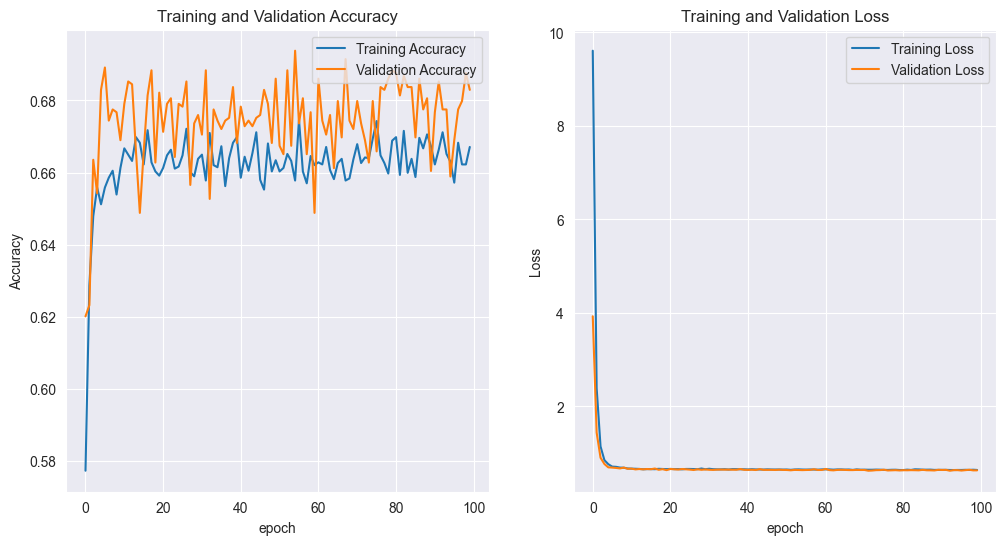

In [208]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(acc_nodraw, label='Training Accuracy')
plt.plot(val_acc_nodraw, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.subplot(1,2,2)
plt.plot(loss_nodraw, label='Training Loss')
plt.plot(val_loss_nodraw, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [220]:
predictions_nodraw = first_model_nodraw.predict(X_test_nodraws_preprocessed)

41/41 [==============================] - 0s 972us/step


In [224]:
predictions_nodraw * 100

array([[68.047806],
       [53.164818],
       [27.83403 ],
       ...,
       [56.72172 ],
       [25.67553 ],
       [29.483362]], dtype=float32)